**Dataset Analysis**

We are going to analize the dataset Chia already translated to BIO-format in order to understand the distribution of entities we are going to deal with in the project.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [3]:
# data path
root_path = '..' # comment if using colab
data_path = f'{root_path}/data'
chia_bio_path = f'{data_path}/chia_bio'

In [4]:
files = os.listdir(chia_bio_path)

In [26]:
# dictionary to store the entities
entities_dict = {}

In [27]:
for file in files:
    # read the file
    with open(f'{chia_bio_path}/{file}', 'r') as f:
        lines = f.readlines()
        lines = [line for line in lines if line != '\n']
    # get the entity name
    entities = [line.split(' ')[-1][:-1] for line in lines]
    # get just the beginning of the entities
    entities = [entity.split('-')[1] for entity in entities if len(entity) > 1 and entity[0] == 'B']
    for entity in entities:
        # store the entity
        if entity not in entities_dict:
            entities_dict[entity] = 0
        entities_dict[entity] += 1

In [28]:
entities_dict

{'Observation': 1665,
 'Temporal': 2934,
 'Procedure': 3197,
 'Condition': 11049,
 'Drug': 3516,
 'Value': 3656,
 'Measurement': 3112,
 'Person': 1528,
 'Device': 346,
 'Mood': 561,
 'Pregnancy_considerations': 184}

In [29]:
entites_df = pd.DataFrame(entities_dict.items(), columns=['Entity', 'Count'])

In [30]:
entities_df = entites_df.sort_values(by='Count', ascending=False)
entities_df = entities_df.reset_index(drop=True)
entities_df

,Entity,Count
0,Condition,11049
1,Value,3656
2,Drug,3516
3,Procedure,3197
4,Measurement,3112
5,Temporal,2934
6,Observation,1665
7,Person,1528
8,Mood,561
9,Device,346


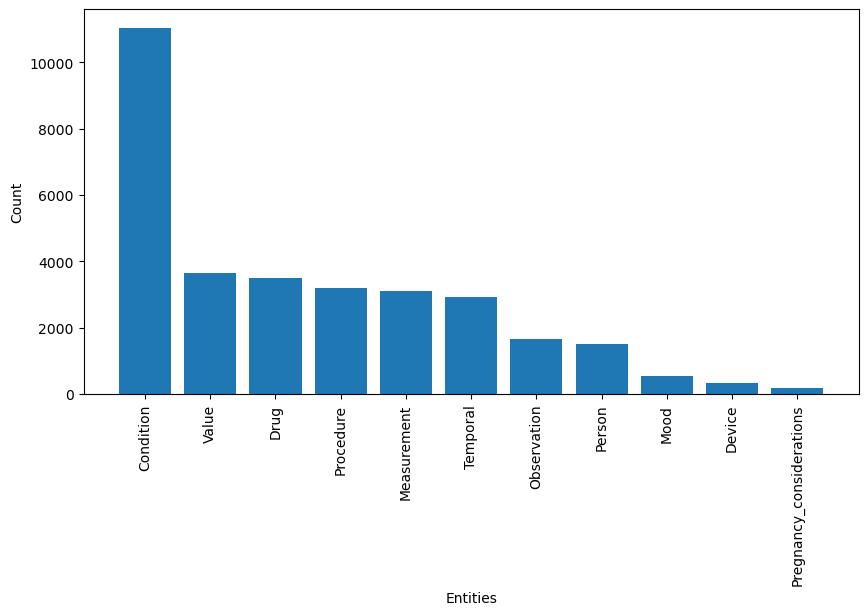

In [33]:
# plot the entities
plt.figure(figsize=(10, 5))
plt.bar(entities_df['Entity'], entities_df['Count'])
plt.xlabel('Entities')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()